In [1]:
%run functions.py

import numpy as np
import pandas as pd
from scipy.io import loadmat
import pickle

from sklearn.svm import LinearSVC
from sklearn.linear_model import Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from warnings import filterwarnings

# Task 3 - Regression 

## Load settings

In [2]:
grid = None
k=10 # Define k for crossvalidation
seed = 42 # Seed to use
feature_tot = 0 # Total selected features -> Start at 0 before PCA
taskname = "task3"
db_set = "datasets/powerTrainData.mat"
filedir = "/home/fredrik/Documents/Learning_systems/Labs/Project/"
#filedir = "C:/Users/fredr/Documents/github-projects/Learning_systems/Labs/Project/"

scoring='neg_mean_squared_error' # Scoring method for GridsearchCV
score_function = f_regression # Score function for Feature selection


np.random.seed(seed) # Define the random seed

In [3]:
# GridSearchCV
estimators = [
    ('clf', 'passthrough'),
]
param_grid = [
    {
        'clf':[SVR()],
        'clf__C':[0.1,10,100],
        'clf__gamma':['scale', 'auto',2]
    },{
        'clf':[Lasso(random_state=seed)],
        'clf__alpha':[0.1,1.0,2.0,5.0],
        'clf__max_iter':[100,1000,5000],

    },{
        'clf':[ElasticNet(random_state=seed)],
        'clf__alpha':[0.1,1.0,2.0,5.0],
        'clf__max_iter':[100,1000,5000],
    },{
        'clf':[RandomForestRegressor(random_state=seed)],  
        'clf__n_estimators':[100,150,200],
        
    },{
        'clf':[MLPRegressor()],
        'clf__hidden_layer_sizes':[(100,20)],
        'clf__activation':['relu'],
        'clf__solver':['adam', 'lbfgs'],
        'clf__alpha':[0.0001,0.001,0.1],
        'clf__max_iter':[200,400],
        'clf__early_stopping':[True, False]
    }
]

## Load dataset

In [4]:
mat = loadmat(db_set)
input_train = mat['powerTrainInput'].T

target_train = mat['powerTrainOutput'].reshape(len(input_train))
input_test = mat['powerTestInput'].T

## Data info

In [5]:
get_data_info(input_train, target_train)

Length of 844
X.shape: (844, 15) y.shape: (844,)
Contains Nan: False False
Contains +inf: False False
Contains -inf: False False


## Preprocess
Normalize the dataset

In [6]:
input_train, input_test, target_train, input_train_copy, input_train_copy_normalized = preprocessing(input_train,target_train, input_test)

Length of input: 844


## Feature distribution

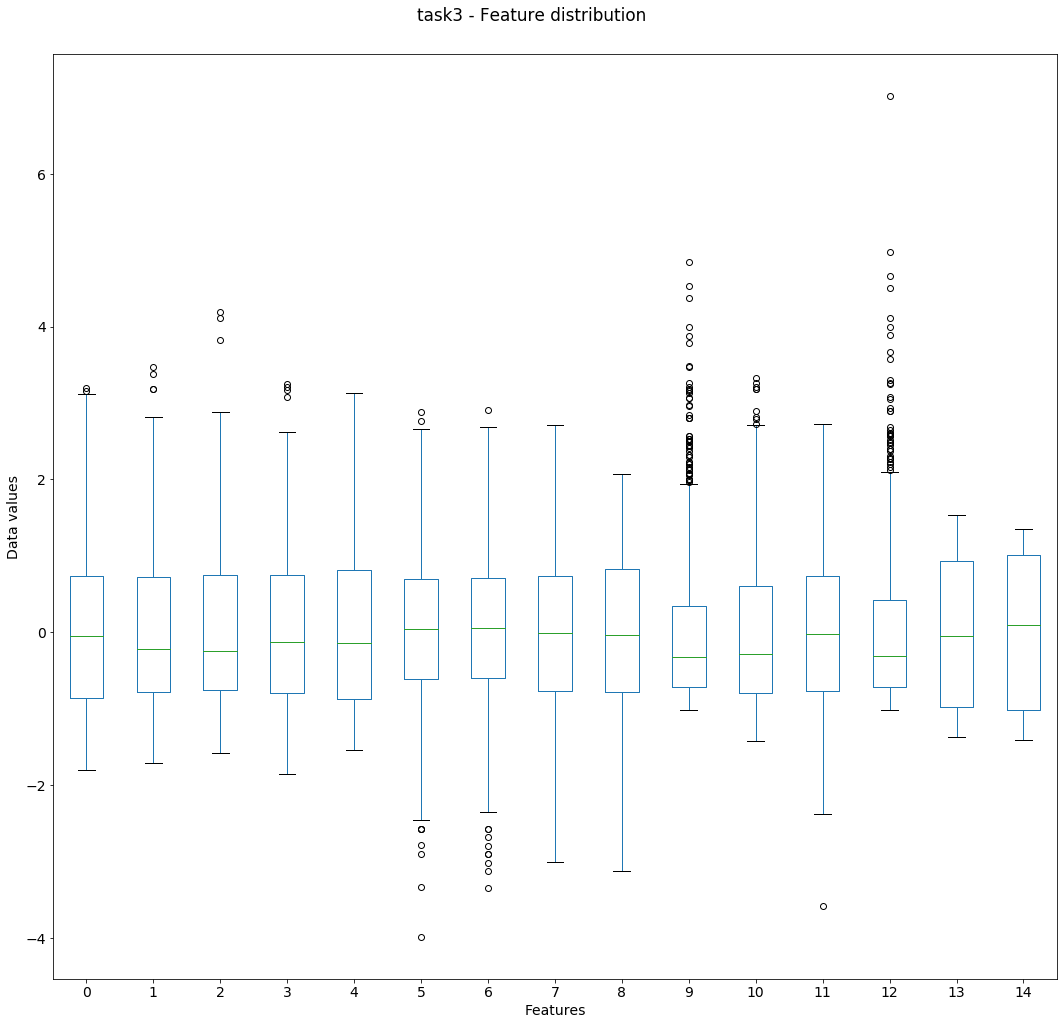

In [7]:
plot_feature_distribution(input_train, filedir=filedir, taskname=taskname)

## Feature reduction
Reduce dimensionality by PCA transform

In [8]:
feature_tot, pca, pca_input = feature_reduction(input_train, target_train,input_train_copy)

original shape:    (844, 15)
transformed shape: (844, 6)
Explained variance: [0.71291343 0.08305948 0.06661705 0.04012179 0.03533515 0.02463563]


## Feature extraction

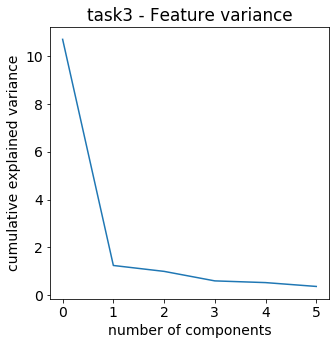

In [9]:
plot_feature_variance(pca_input, filedir=filedir, taskname=taskname)

## Feature selection
Extract top features above depending on PCA

[ 0  1  2  3  4 11]
Shape of input: (844, 15)


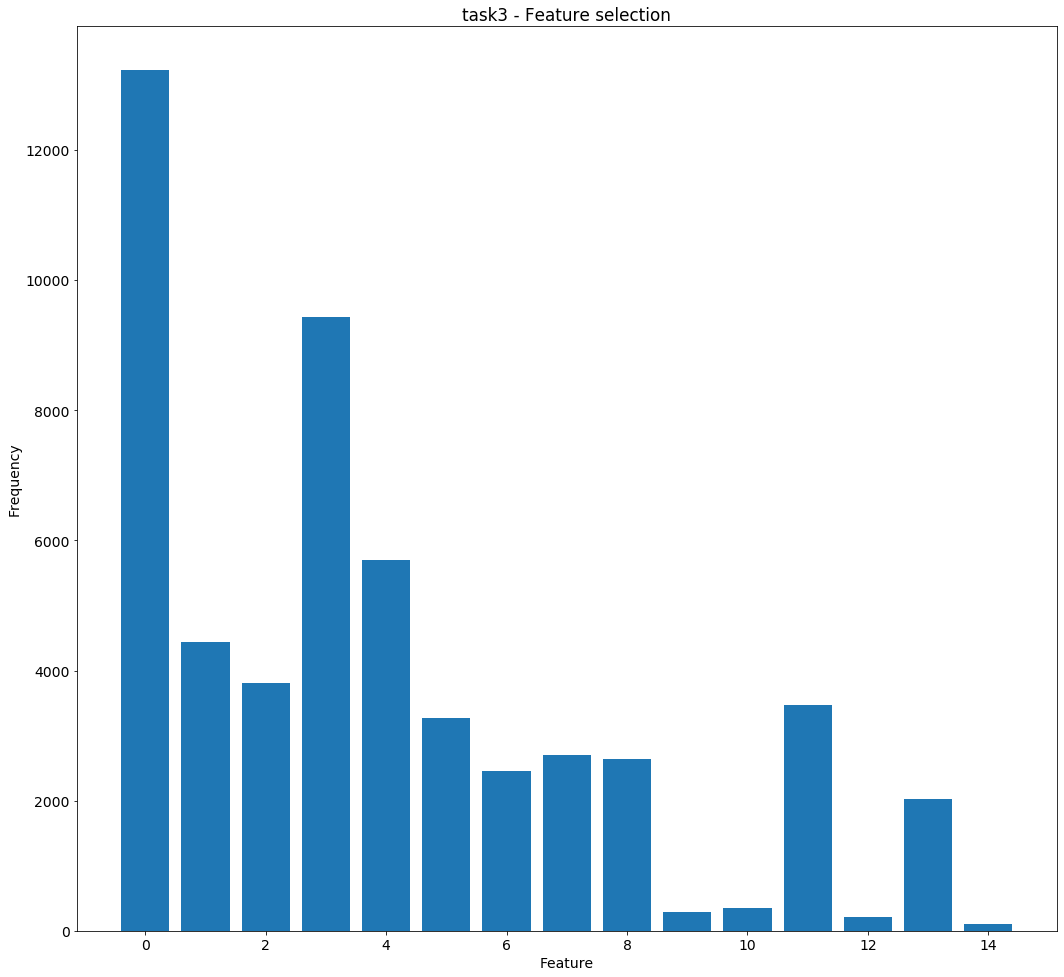

In [10]:
input_train_fs, input_test_fs = feature_selection(score_function, input_train, target_train, input_test, filedir=filedir, taskname=taskname,feature_tot=feature_tot)

## Feature Relationship

x-axis contain features and y is frequency of values


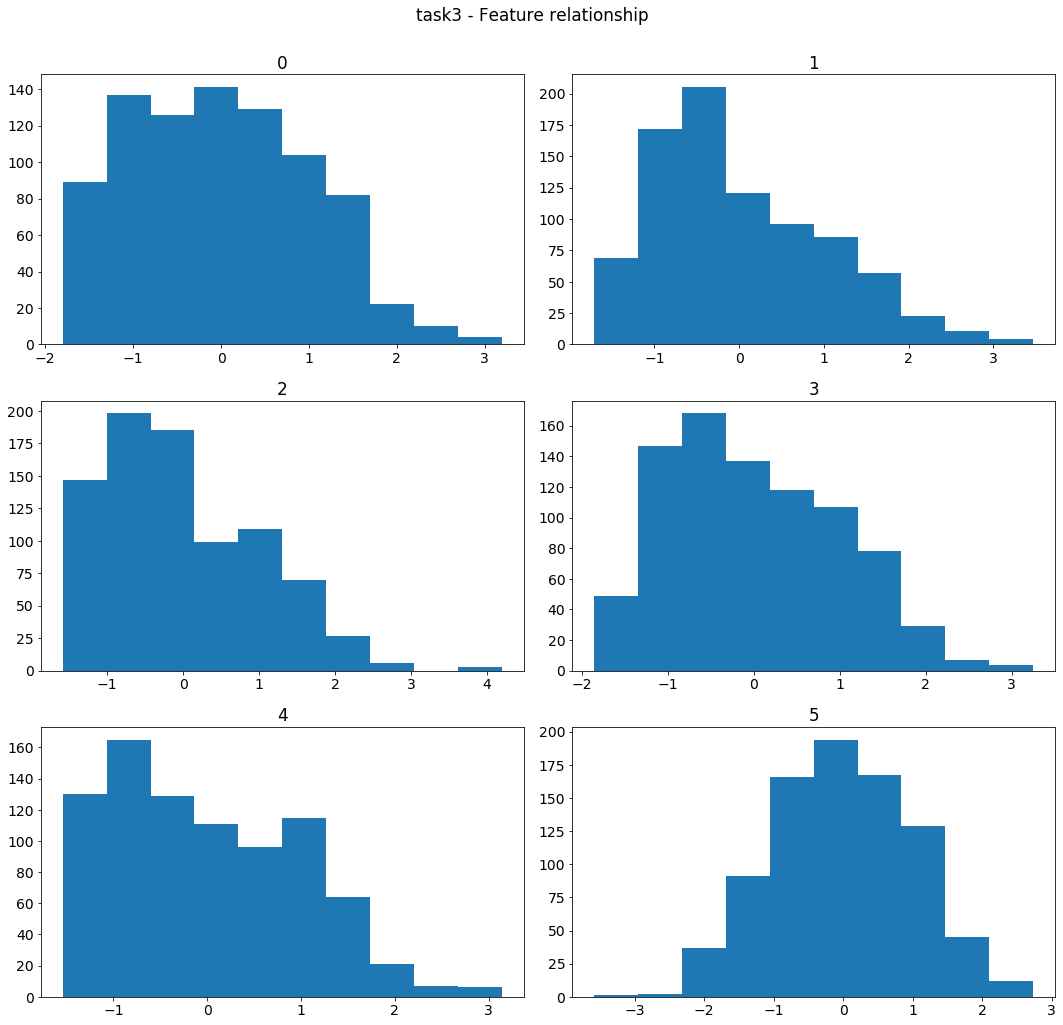

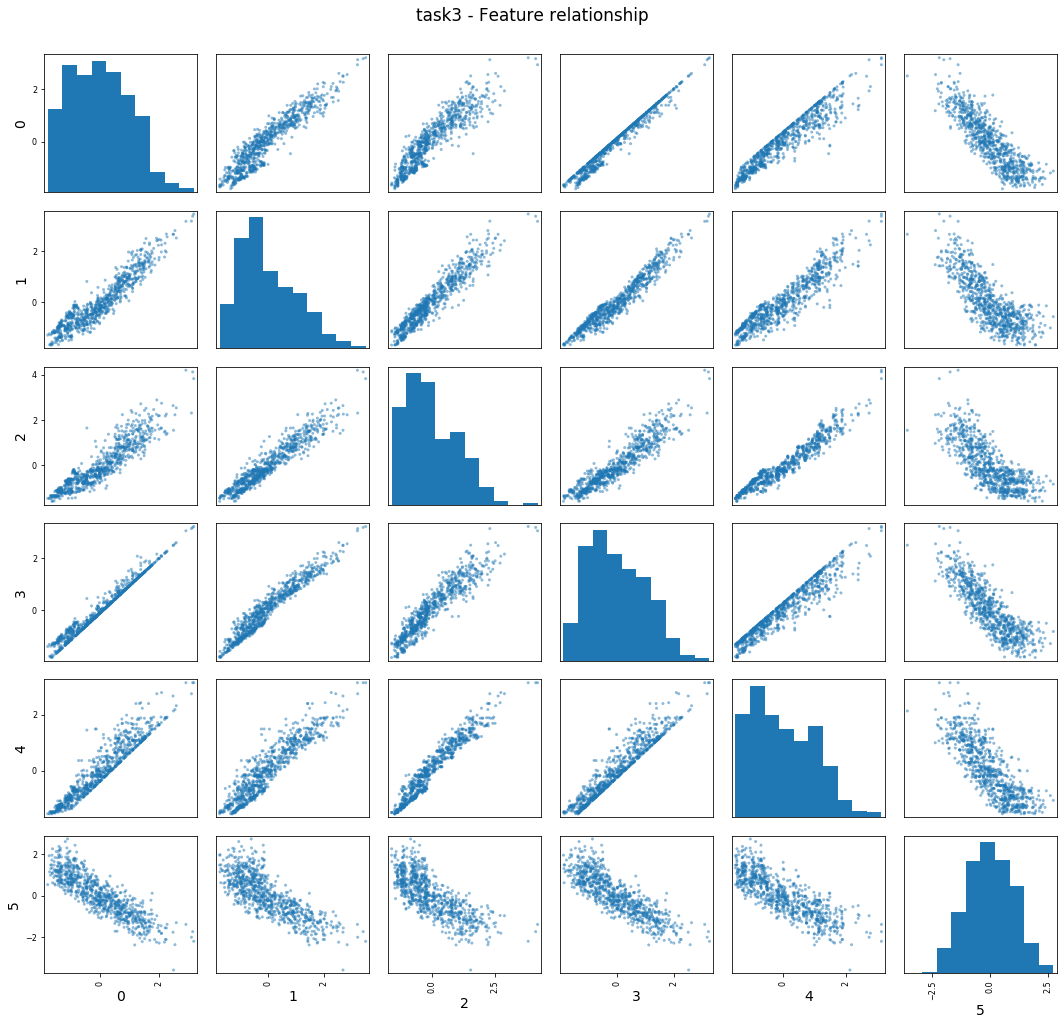

In [11]:
plot_feature_relationship(input_train_fs, filedir, taskname)

## Hyperparameter tuning

In [26]:
# GridSearchCV
grid = parameter_tuning(estimators, param_grid, input_train_fs, target_train, scoring=scoring, k=k)


Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  5.5min finished


## Save model

In [27]:
save_model(grid, filedir=filedir, taskname=taskname)

Save model into: /home/fredrik/Documents/Learning_systems/Labs/Project/Models/task3.joblib


## Load model

In [12]:
if not grid: 
    grid = load_model(filedir=filedir, taskname=taskname)

Loading model:  /home/fredrik/Documents/Learning_systems/Labs/Project/Models/task3.joblib


## Get Model info

In [13]:
get_model_info(grid)

    mean_test_score  std_test_score  rank_test_score  \
37    -11045.390588     3365.367820                1   
53    -11070.896047     3156.145822                2   
57    -11132.070579     3186.454146                3   
41    -11146.364063     3122.681592                4   
49    -11212.381375     3420.469817                5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

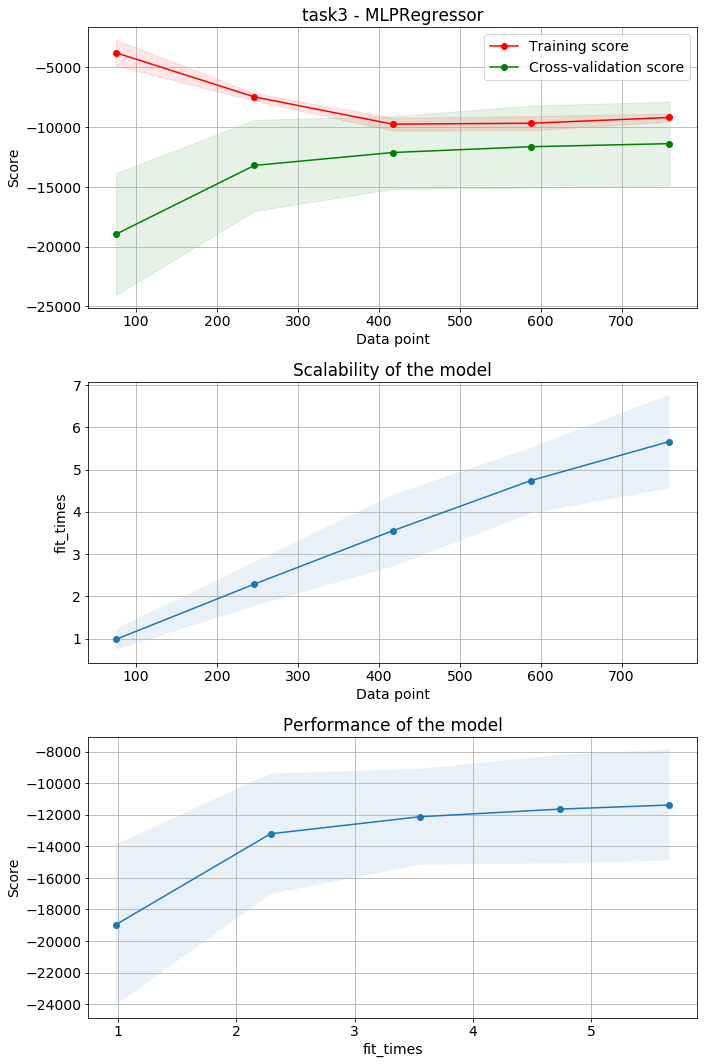

In [14]:
validate_curve(grid, input_train_fs, target_train, filedir=filedir, taskname=taskname,scoring=scoring, k=k)

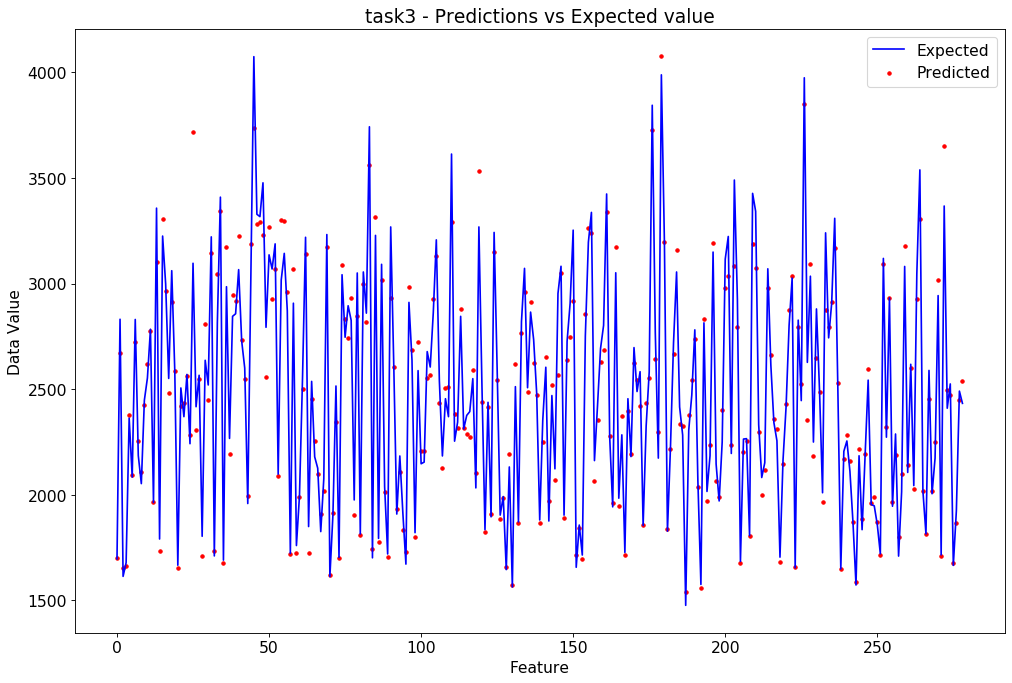

In [15]:
display_model_predict(grid, input_train_fs, target_train, filedir=filedir, taskname=taskname)

# Predict testset

In [16]:
_,predict = predict_model(grid, input_train_fs, target_train, input_test_fs)
save_prediction(predict, filedir, taskname)
print(predict)

[3212.38416364 3093.33184698 3214.18573049 3125.5226766  2853.11767343
 2498.42606851 2422.59608019 3366.20354236 3118.16554108 3305.65619443
 3233.06516033 3414.07947426 2966.74178889 2850.16453993 2459.02906312
 3182.56367112 3277.79814446 3205.89536227 2717.75071486 3248.76042995
 2893.99001003 3099.40494866 3214.0356291  3275.61341988 2975.96251936
 3145.77500223 3517.26630045 2352.61763727 3202.93102385 3302.1522311
 3667.18190174 2851.9418024  3096.38904709 3915.50370989 3457.21163952
 3029.10941065 3376.49889397 2772.06178599 3137.96477029 2882.1237254
 2634.83561769 3492.50614439 3061.13772843 3395.37196751 3481.08678595
 3057.67147869 2510.8347434  2811.06985072 2859.87790734 2354.52773412
 3141.98508794 3480.88974407 3093.1461915  2462.44764228 2914.25086753
 3108.43057691 2611.11025938 3286.43555502 3416.02984716 3113.10660867
 3141.02093967 3698.97279151 2950.82266654 3083.75078952 3581.48436532
 3266.20589638 3208.85324162 3150.99093983 2970.47161829 3302.00333144
 2537.44